# Exercise 28 Agustus 2019
# Import Libraries

In [3]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [4]:
#Read data

data_losses=pd.read_csv('automobile-losses.csv',encoding='Latin1')
data_risk=pd.read_csv('automobile-risk.csv',encoding='Latin1')
data_spec=pd.read_csv('automobile-spec.csv',encoding='Latin1')

# Merge data

In [5]:
#merge data using the similar keys in data 'ID', but 'merge' is only able to merge two data 
#so we will need to take it to two stages

data1=pd.merge(data_losses, data_risk, how='outer', on='ID') #first, merge two data to be new data frame
datanew=pd.merge(data1, data_spec, how='outer', on='ID' )    #second, then the 'new data frame' merge with other data

#get the 5 first of data using .head()
datanew.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Part 1

# Quick-look Data


In [6]:
#get the 5 lastest of data using .tail()
datanew.tail()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,201,95.0,-1,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,202,95.0,-1,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,203,95.0,-1,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,204,95.0,-1,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,205,95.0,-1,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [7]:
#get information number of rows and columns using .shape
datanew.shape

(205, 27)

In [8]:
#get data type information using .info
datanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    164 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-nu

In [9]:
#get summary statistics of data using .describe()
datanew.describe()

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,103.000000,122.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,59.322565,35.442168,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,1.000000,65.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,103.000000,115.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,150.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,205.000000,256.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Identify and Handle Missing Values

In [10]:
#detection missing values each variables of data
count_missing = datanew.isnull().sum().sort_values(ascending = False)
count_missing.head()

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
dtype: int64

In [11]:
#count percentage of missing values each variables of data
percentage = round(datanew.isnull().sum()/len(datanew)*100,2).sort_values(ascending = False)
percentage.head()

normalized-losses    20.00
price                 1.95
stroke                1.95
bore                  1.95
peak-rpm              0.98
dtype: float64

In [12]:
#handling missing values by replacing numeric data using median and categoric data using mode
#fisrt, handling missing values in numeric data
median_value1=datanew['normalized-losses'].median()
median_value2=datanew['price'].median()
median_value3=datanew['stroke'].median()
median_value4=datanew['bore'].median()
median_value5=datanew['peak-rpm'].median()
median_value6=datanew['horsepower'].median()
datanew['normalized-losses']=datanew['normalized-losses'].fillna(median_value1)
datanew['price']=datanew['price'].fillna(median_value2)
datanew['stroke']=datanew['stroke'].fillna(median_value3)
datanew['bore']=datanew['bore'].fillna(median_value4)
datanew['peak-rpm']=datanew['peak-rpm'].fillna(median_value5)
datanew['horsepower']=datanew['horsepower'].fillna(median_value6)
datanew.head()


,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [13]:
count_missing = datanew.isnull().sum().sort_values(ascending = False)
count_missing.head()

num-of-doors         1
price                0
width                0
normalized-losses    0
symboling            0
dtype: int64

In [57]:
##second, handling missing values in categorical data using mode
datanew = datanew.fillna(datanew['num-of-doors'].value_counts().index[0])
datanew.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,115.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,115.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [15]:
count_missing = datanew.isnull().sum().sort_values(ascending = False)
count_missing.head()

price                0
width                0
normalized-losses    0
symboling            0
make                 0
dtype: int64

# Visualization Data

In [16]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    205 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-nu

# Visualization of Numerical Data

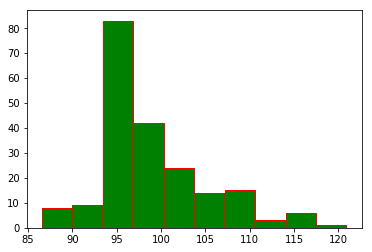

In [17]:
#create histogram of data 'wheel-base'

plt.hist(datanew['wheel-base'], 
         facecolor='green', 
         edgecolor='red', 
         bins=10)
plt.show()

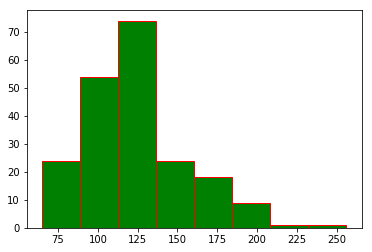

In [18]:
#create histogram of data 'normalized-losses'

plt.hist(datanew['normalized-losses'], 
         facecolor='green', 
         edgecolor='red', 
         bins=8)
plt.show()

In [19]:
numerical=['normalized-losses', 'symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore',
           'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
categorical=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheel', 'engine-loc', 'engine-type', 'cylinder',
            'fuel-system'] 

In [20]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    205 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-nu

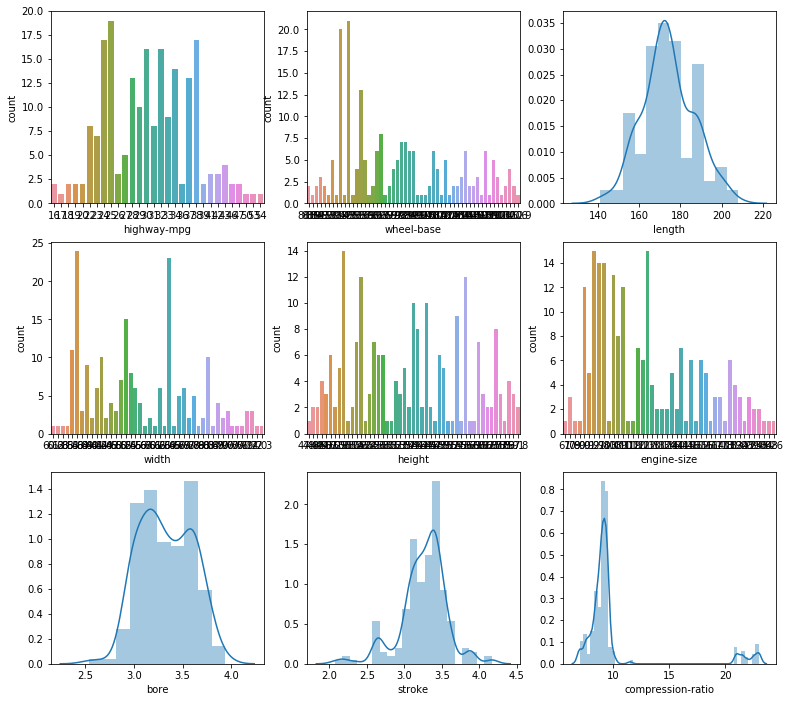

In [21]:
#get visualization of data using seaborn as sns

f=plt.figure(figsize=(13,12))
f.add_subplot(3,3,1)
sns.countplot(datanew['highway-mpg'])
f.add_subplot(3,3,2)
sns.countplot(datanew['wheel-base'])
f.add_subplot(3,3,3)
sns.distplot(datanew['length'])
f.add_subplot(3,3,4)
sns.countplot(datanew['width'])
f.add_subplot(3,3,5)
sns.countplot(datanew['height'])
f.add_subplot(3,3,6)
sns.countplot(datanew['engine-size'])
f.add_subplot(3,3,7)
sns.distplot(datanew['bore'])
f.add_subplot(3,3,8)
sns.distplot(datanew['stroke'])
f.add_subplot(3,3,9)
sns.distplot(datanew['compression-ratio'])

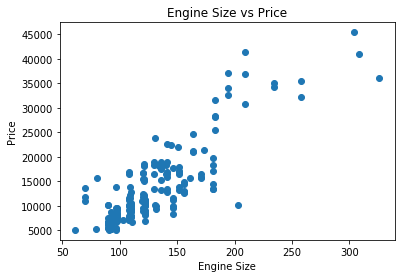

In [22]:
#create scatter plot of engine-size vs price

plt.scatter(datanew['engine-size'],datanew['price'])
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

# Visualization of Categorical Data

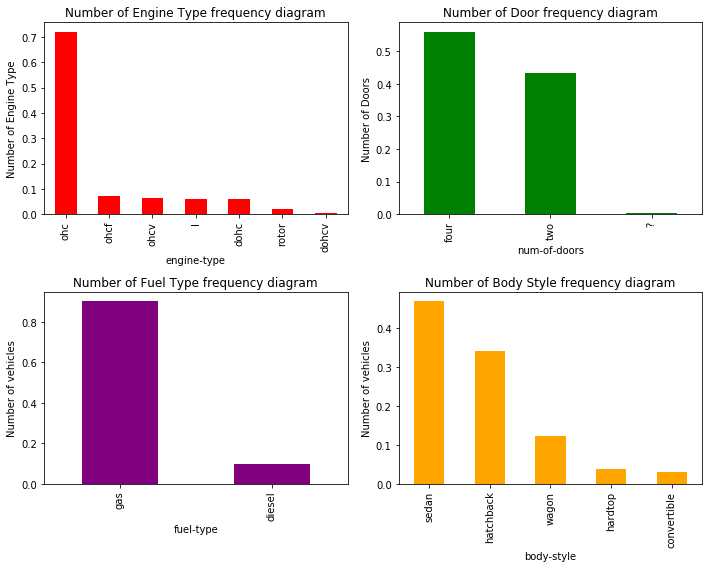

In [23]:
#visualization of categorical data using bar plot

plt.figure(1)
plt.subplot(221)
datanew['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


plt.subplot(222)
datanew['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
datanew['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

plt.subplot(224)
datanew['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

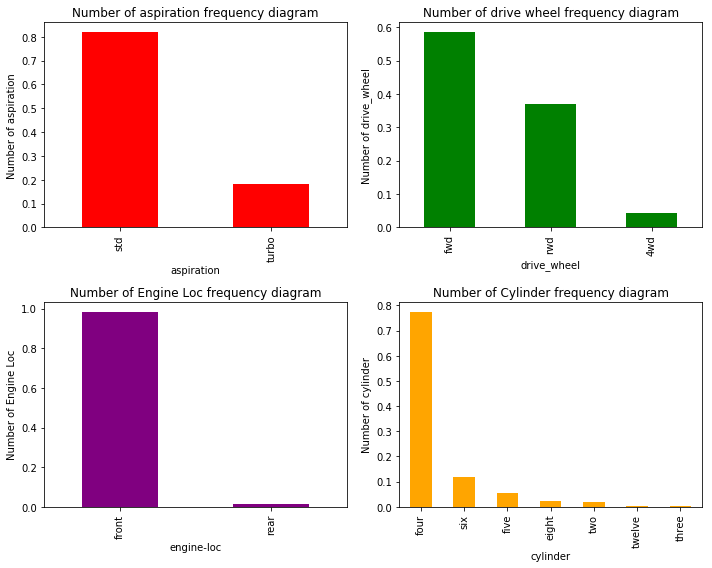

In [26]:
#visualization of categorical data using bar plot

plt.figure(1)
plt.subplot(221)
datanew['aspiration'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of aspiration frequency diagram")
plt.ylabel('Number of aspiration')
plt.xlabel('aspiration');


plt.subplot(222)
datanew['drive-wheel'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of drive wheel frequency diagram")
plt.ylabel('Number of drive_wheel')
plt.xlabel('drive_wheel');

plt.subplot(223)
datanew['engine-loc'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Engine Loc frequency diagram")
plt.ylabel('Number of Engine Loc')
plt.xlabel('engine-loc');

plt.subplot(224)
datanew['cylinder'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Cylinder frequency diagram")
plt.ylabel('Number of cylinder')
plt.xlabel('cylinder');
plt.tight_layout()
plt.show()

Text(0.5,0,'Make')

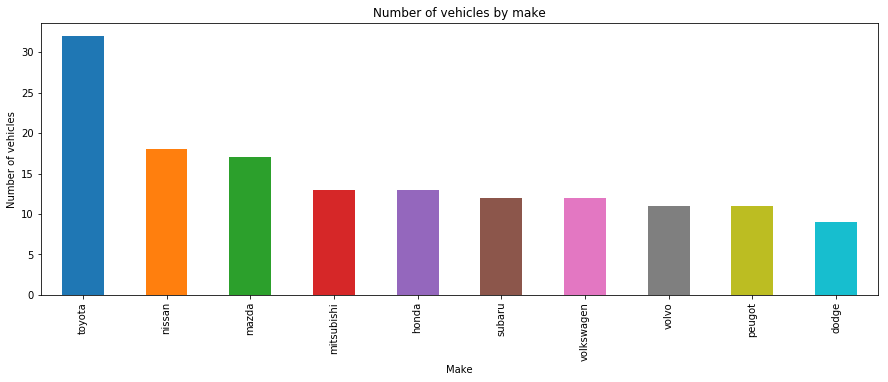

In [47]:
#visualization of categorical data using bar plot
datanew['make'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

Text(0.5,1,'Distribution of Body Style')

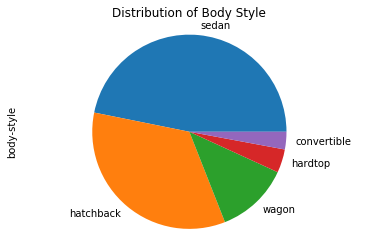

In [28]:
#create pie chart of data 'body_style'

datanew['body-style'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Distribution of Body Style')

# Part 2

In [53]:
#get car brand with the highest price

import pandas as pd
make_sort=datanew.sort_values(by=['price'], ascending=False)
make_sort.head(1)

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,75,115.0,1,mercedes-benz,gas,std,two,hardtop,rwd,front,...,304,mpfi,3.8,3.35,8.0,184.0,4500.0,14,16,45400.0


In [33]:
#get information of maximum horsepower for car with 6 cylinder engine 

cylinder6=datanew[datanew['cylinder']=='six'] #filtering data that cylinder == 'six'
cylinder6['horsepower'].max()

207.0

In [34]:
#get average peak-rpm for ‘turbo’ style aspiration car 

aspirationturbo=datanew[datanew['aspiration']=='turbo']
aspirationturbo['peak-rpm'].mean()

4939.189189189189

In [35]:
#get average price based on body-style

body_style=datanew.groupby(['body-style']).mean()
body_style

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
body-style,,,,,,,,,,,,,,,,,
convertible,94.666667,122.666667,2.833333,92.700000,170.383333,65.583333,51.433333,2801.666667,157.166667,3.491667,3.043333,8.933333,131.666667,5158.333333,20.500000,26.000000,21890.500000
hardtop,125.875000,126.000000,1.875000,98.500000,176.937500,66.612500,52.850000,2810.625000,176.250000,3.608750,3.322500,10.725000,142.250000,5031.250000,21.625000,27.250000,22208.500000
hatchback,93.842857,129.642857,1.585714,95.535714,166.592857,65.247143,52.108571,2348.185714,114.400000,3.243429,3.280143,9.027429,101.242857,5232.142857,26.314286,32.171429,9967.085714
sedan,102.072917,119.750000,0.333333,100.619792,177.585417,66.260417,54.337500,2610.593750,130.822917,3.338542,3.267292,10.937500,103.104167,5081.770833,25.322917,30.833333,14372.989583
wagon,126.880000,96.320000,-0.160000,102.156000,181.304000,66.256000,56.728000,2784.240000,123.840000,3.406400,3.175600,10.316000,97.640000,5022.000000,24.040000,28.720000,12371.960000


In [36]:
body_style.loc[['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], ['price']]

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9967.085714
sedan,14372.989583
wagon,12371.960000


In [37]:
#get average price based on body-style only for Honda car (make=Honda)

honda=datanew[datanew['make']=='honda']
body_style_honda=honda.groupby(['body-style']).mean()
body_style_honda

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
body-style,,,,,,,,,,,,,,,,,
hatchback,34.571429,112.714286,1.0,92.471429,153.457143,64.314286,52.285714,1970.0,95.285714,2.978571,3.410,9.328571,74.0,5700.0,33.142857,38.285714,7054.428571
sedan,40.400000,94.400000,0.2,96.500000,171.740000,64.580000,53.560000,2288.8,106.400000,3.102000,3.546,9.060000,89.8,5780.0,26.600000,31.800000,9945.000000
wagon,37.000000,78.000000,0.0,96.500000,157.100000,63.900000,58.300000,2024.0,92.000000,2.920000,3.410,9.200000,76.0,6000.0,30.000000,34.000000,7295.000000


In [38]:
body_style_honda.loc[['hatchback','sedan','wagon'],['price']]

,price
body-style,
hatchback,7054.428571
sedan,9945.000000
wagon,7295.000000
